In [22]:
import os.path
import os
import math as m
#import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [23]:
def gen_lattice(S0, u, d, N):
    """generates a binomial lattice
    
    for a given up, down, start value and number of steps (N).
    Resulting lattice has N+1 levels.
    """
    S = [float(S0)]

    for i in range(1, N+1):
        for j in range(0, i+1):
            S.append( S0 * d**j * u**(i-j) )

    return S


In [24]:
gen_lattice(S0=100., N=3, u=1.1, d=.9)

[100.0,
 110.00000000000001,
 90.0,
 121.00000000000001,
 99.00000000000001,
 81.0,
 133.10000000000005,
 108.90000000000002,
 89.10000000000001,
 72.9]

The number of levels in a binomial lattice of length N is $\frac{\sqrt{8N+1}-1}{2}$

In [25]:
def lattice_levels(S):
    return int( round( (m.sqrt(8*len(S)+1)-1)/2 ) )

lattice visialisation based on idea from [link](http://www.theresearchkitchen.com/archives/738)

In [27]:
tmp = os.path.join(os.path.expanduser('~'), 'tmp')
if not os.path.exists(tmp):
    os.makedirs(tmp)

In [28]:
def dotlattice(S, filename, labels=True):
    f = open(filename, 'w')
    f.write("digraph G {\n")

    shape = "plaintext" if labels else "point"

    f.write("node[shape=%s, samehead=true, sametail=true];\n" % shape)
    f.write("rankdir=LR;\n")

    f.write("edge[arrowhead=none];\n")

    # Create a dot node for each element in the lattice
    for i in range(0, len(S)):
        f.write( "node%d[label=\"%g\"];\n" % (i+1, S[i]) )

    # The number of levels in a binomial lattice
    L = lattice_levels(S)

    k=1
    for i in range(1, L):
        tabs = "\t" * (i-1)
        j = i
        while( j>0 ):
            f.write("node%d->node%d;\n" % (k, k+i))
            f.write("node%d->node%d;\n" % (k, k+i+1))
            k = k + 1
            j = j - 1

    f.write("}\n")


(-0.5, 691.5, 418.5, -0.5)

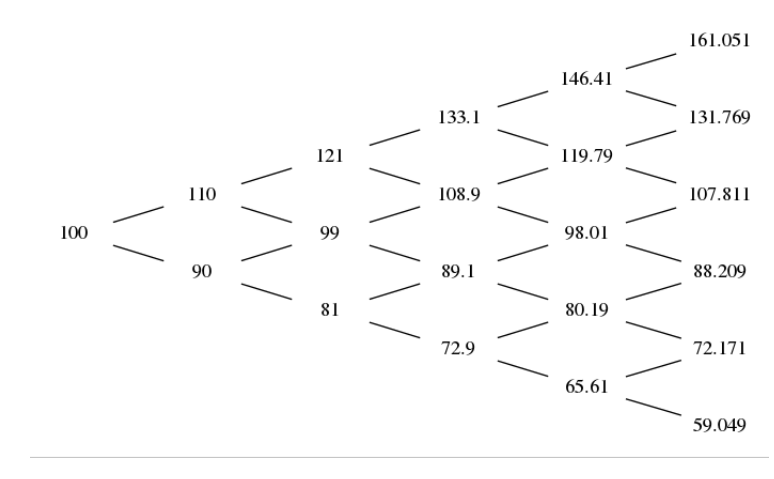

In [29]:
name="lattice"
dotlattice(gen_lattice(S0=100., N=5, u=1.1, d=0.9), filename=os.path.join(tmp, name+".dot") )
!dot -Tpng -o ~/tmp/{name}.png -v ~/tmp/{name}.dot 2> /dev/null

plt.figure(figsize=(16,8))
plt.imshow( mpimg.imread(os.path.join(tmp, name+".png")) )
plt.axis('off')

$0 < d < e^{r \Delta t} < u$

$u = e^{ \sigma \Delta t }$

$d = \frac{1}{u}$

$p = \frac{e^{r \Delta t} - d}{u - d}$ - вероятность движения вверх на каждом шаге

## call

In [70]:
N1 = 1000 #длина дерева(кол-во уровней)
sigma = .2 #
T = 1. #
deltaT = T / N1 #
u1 = m.exp(sigma * m.sqrt(deltaT))#вер-ть повыш цены(?)
d1 = 1/u1#вер-сть движения вниз(?)
S = gen_lattice(S0=100., N=1000, u=u1, d = d1)#генерим дерево
r = 0.05#процентная ставка
p = (m.exp(r * deltaT) - d1)/(u1 - d1)#вер-ть вдижения вверх
######

L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('---')
#for i in range(len(S)-L, len(S) ):
#    print(S[i])
    
print( '---')


K = 100 #нач цена
for i in range(len(S) - L - 1, len(S) - 1):#пересчитываем последний уровень
    S[i] =  max(0, S[i] - K)#пороговая обработка, по сути, считаем прибыль в итоге
    #print(S[i])

k = len(S) - L - 1
print(k)
for i in reversed(range(1, L)):
    for j in range (0, i): #теперь идем от последнего уровня вниз, к началу дерева по уровням.выбираем макс из прибыли в этом узле и что-то там
        S[k] = max(S[k] - K, m.exp(-r * deltaT) * (p * S[k + i] + (1 - p)*S[k + i + 1]))
        k -= 1

print(S[0])
        

   


levels: 1001 len: 501501; number of first node on the last level: 500500
---
---
500499
10.4485841038


## put

In [64]:
N1 = 1000
sigma = .2
T = 1.
deltaT = T / N1
u1 = m.exp(sigma * m.sqrt(deltaT))
d1 = 1/u1
S = gen_lattice(S0=100., N=1000, u=u1, d = d1)
r = 0.05
p = (m.exp(r * deltaT) - d1)/(u1 - d1)
######

L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('---')
#for i in range(len(S)-L, len(S) ):
#    print(S[i])
    
print( '---')


K = 100
for i in range(len(S) - L - 1, len(S) - 1):
    S[i] = max(0, -S[i] + K)#почти то же самое, только наоборот)))
    #print(S[i])

k = len(S) - L - 1
print(k)
for i in reversed(range(1, L)):
    for j in range (0, i):
        S[k] = m.exp(-r * deltaT) * (p * S[k + i] + (1 - p)*S[k + i + 1])
        k -= 1

print(S[0])
        

   


levels: 1001 len: 501501; number of first node on the last level: 500500
---
---
500499
5.57152655383


In [ ]:

for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1


In [17]:
L


1001

In [10]:
S = gen_lattice(S0=100., N=5, u=1.1, d=0.9)
######

L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('---')
for i in range(len(S)-L, len(S) ):
    print(S[i])
    
print( '---')

k=len(S)-L-1 # last index before the last level starts
for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1

levels: 6 len: 21; number of first node on the last level: 15
---
161.051
131.769
107.811
88.209
72.171
59.049
---
65.610000 connected to 72.171000 and 59.049000
80.190000 connected to 88.209000 and 72.171000
98.010000 connected to 107.811000 and 88.209000
119.790000 connected to 131.769000 and 107.811000
146.410000 connected to 161.051000 and 131.769000
72.900000 connected to 80.190000 and 65.610000
89.100000 connected to 98.010000 and 80.190000
108.900000 connected to 119.790000 and 98.010000
133.100000 connected to 146.410000 and 119.790000
81.000000 connected to 89.100000 and 72.900000
99.000000 connected to 108.900000 and 89.100000
121.000000 connected to 133.100000 and 108.900000
90.000000 connected to 99.000000 and 81.000000
110.000000 connected to 121.000000 and 99.000000
100.000000 connected to 110.000000 and 90.000000


----------------